In [1]:
#Importing necessary libraries for "Exploratory data analysis"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving adult_with_headers.csv to adult_with_headers (2).csv


In [3]:
#Reading the csv file
df =pd.read_csv("adult_with_headers.csv")

## **Data Exploration And Preprocessing**

### **Exploration Data Analysis**

### **Loading Data set**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### **Descriptive Statistics**

In [6]:
#Summary statistics of the numerical columns
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
Skewness = df.skew(numeric_only=True)
Kurtosis = df.kurt(numeric_only=True)  #Skewness and kurtosis of numerical columns
Missing_values = df.isnull().sum()
Unique_values = df.nunique()  #Along with missing and unique values


stats_table =pd.DataFrame({'Skewness':Skewness,
                           'Kurtosis':Kurtosis,
                           'Missing_values':Missing_values,
                           'Unique_values':Unique_values})

stats_table  #All in table format

,Skewness,Kurtosis,Missing_values,Unique_values
age,0.558743,-0.166127,0,73
capital_gain,11.953848,154.799438,0,119
capital_loss,4.594629,20.376802,0,92
education,NaN,NaN,0,16
education_num,-0.311676,0.623444,0,16
fnlwgt,1.446980,6.218811,0,21648
hours_per_week,0.227643,2.916687,0,94
income,NaN,NaN,0,2
marital_status,NaN,NaN,0,7
native_country,NaN,NaN,0,42


In [8]:
df.describe(include=['object'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


#### **General Observervations**

**From Info And Review**

The data set is about employees in different working classes with some personal informations there are some
- The first column represents the age of employees mostly adults around 18 to 60

- Second columns about which sector or working class does employees belongs to.

- The third column "fnlwgt" means final weight of employees which mightve been varied before in different aspects like years apart,diet plans,etc

- Fourth and fifth columns which are education and education num are related with each other individual highest educational status
      Eg:Bachelors - 13,
         HS_grad - 9,
         11th - 7,etc.

- Marital state - the marital status of the employees.

- Occupation-ocupation of the employee hold's in different working classes

- Relation ship - the relation of th individual employee within their family.

- Race - the ethnicity of the employee Eg:white,asian-american black,asian-pac-islander,etc.

- Sex - The genser of the individual employee typically male or female.

- Capital_gain and capital_loss are the products of the individual employee in investment in their assests or other business.

- Hours per week - the working hour of individual employee.

- Native Country - country where the individual born in.

- Income - this is a typical target variable and it has predictable values of income of the employee.

**From Descriptive Statistics**

There are 32.5K entries in the data set which is about employees with some personal information.these entries descirbes about what their age,weight,occupation,incomes,marital status,native country,capital gain&loss,sex,relation ship,race,education etc.

- Age : minimum age is 17 probably an adolescent working as intern or a job that doesn't require legal age to work.with maximum being 90 is probably an outlier with avg 38.
> - Skewness:(0.558743) Slightly positive(Right) skewed
 - Kurtosis:(-0.166127) flatter than normal distribution probably platykurtic

- Working Class: there are 9 different working classes private being the top one with frequency above 22k

- fnlwgt : min = 1.228500e+04,max = 1.484705e+06,avg = 1.897784e+05	this columns represents weight factor of the employees which often used as how many preple that represents the same weight of the employee.
> - Skewness:(1.45) Moderately positive skew. The distribution has a tail on the right, which is common for weighting factors that might vary widely.
 - Kurtosis:(6.22) Indicating heavier tails than a normal distribution, suggesting some observations have particularly high weights.

- Education: there 16 different educational qualifiecations among the employees most of them are HS-graduates which is around 10K.

- Education num:it represent education column with given with numerical values with avg of 10 ,min is 1 and max is 16 which highest education qualification.
 > - Skewness:(-0.31) A slight negative skew, means tail is a bit longer on the left side of the distribution.
  - Kurtosis:(0.62) near normal distribution with little peaks.

- Marital status: 7 different status whenther employee is married or not divorced, married to who type etc.

- Occupation: there are 15 different types of occupations and a lot of them are prof in certain speciality which are more than 4K.

- Relationship:employees have 6 different relations with their families,one of them is son in his family other might be wife to her family member,etc

- Race : 5 different ethnicities among employees whites are most of them around 27K which is between 70-80%.

- Sex : Obviously two types male and female with males being 21K of 32K.

- Capital gain and loss : Although the avg of both columns are 1077 and 87 respectively but both of them have 0 values till 75th percentile so these are extreme values probably self employed individuals or might outliers.

 >- Capital_gain
    - Skewness:(11.95) Extremely positive(Right) skewed distrbution with heavy tails to right.
    - Kurtosis:(154.79) Extremely leptokurtic with heavy tails and high peak.

 > - Capital_loss
    - Skewness:(4.59) Highly positive(right) skewed with long tails.
    - Kurtosis:(20.37) Leptokurtic with heavy tails and outliers

- Hours per week : Min is 1 hour while 99 is max which suggest both are outliers while avg being 40 seems normal with std of 12.
> - Skewness:(0.23) Near symmetric with a slight positive skew,
 - Kurtosis:(2.92) Close to normal distribution in terms of peakedness.

- Native country: The employees came from 41 different countries since the unique value is 42 but about 29K are came from united states suggests that data set is gathered in united states.

- Income : probable prediction of the individual employees ,the predicted values are two different categories < 50K and <=50K and most of the employees might have <=50K since it has 24.7K freqency.

### **Data Visualization**

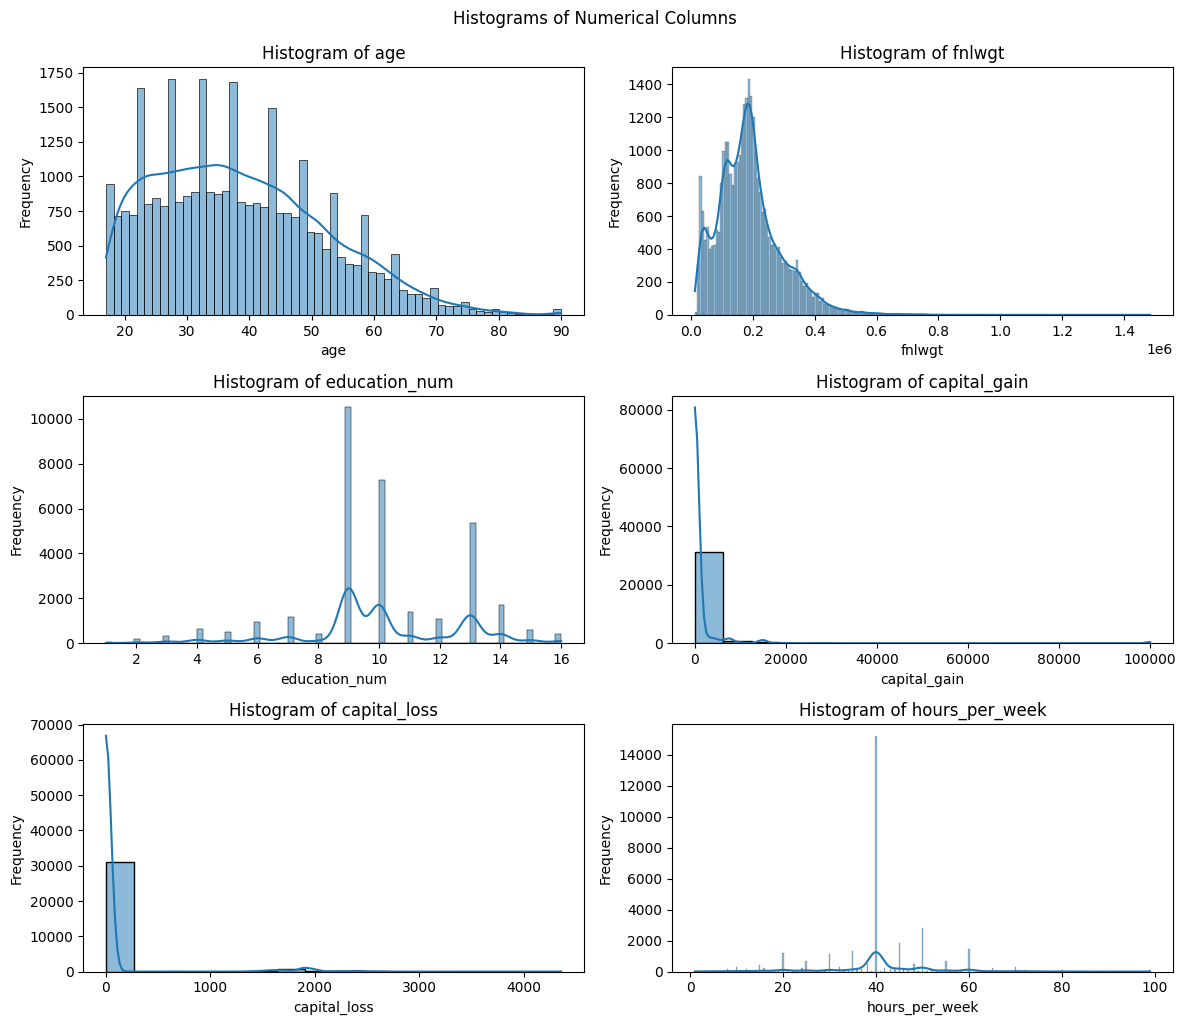

In [9]:
#Creating Histograms for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

#Histogram of numerical columns
fig, axes = plt.subplots(3,2 , figsize=(12,10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True,bins="auto", ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.suptitle('Histograms of Numerical Columns', y=1.02)
plt.show()

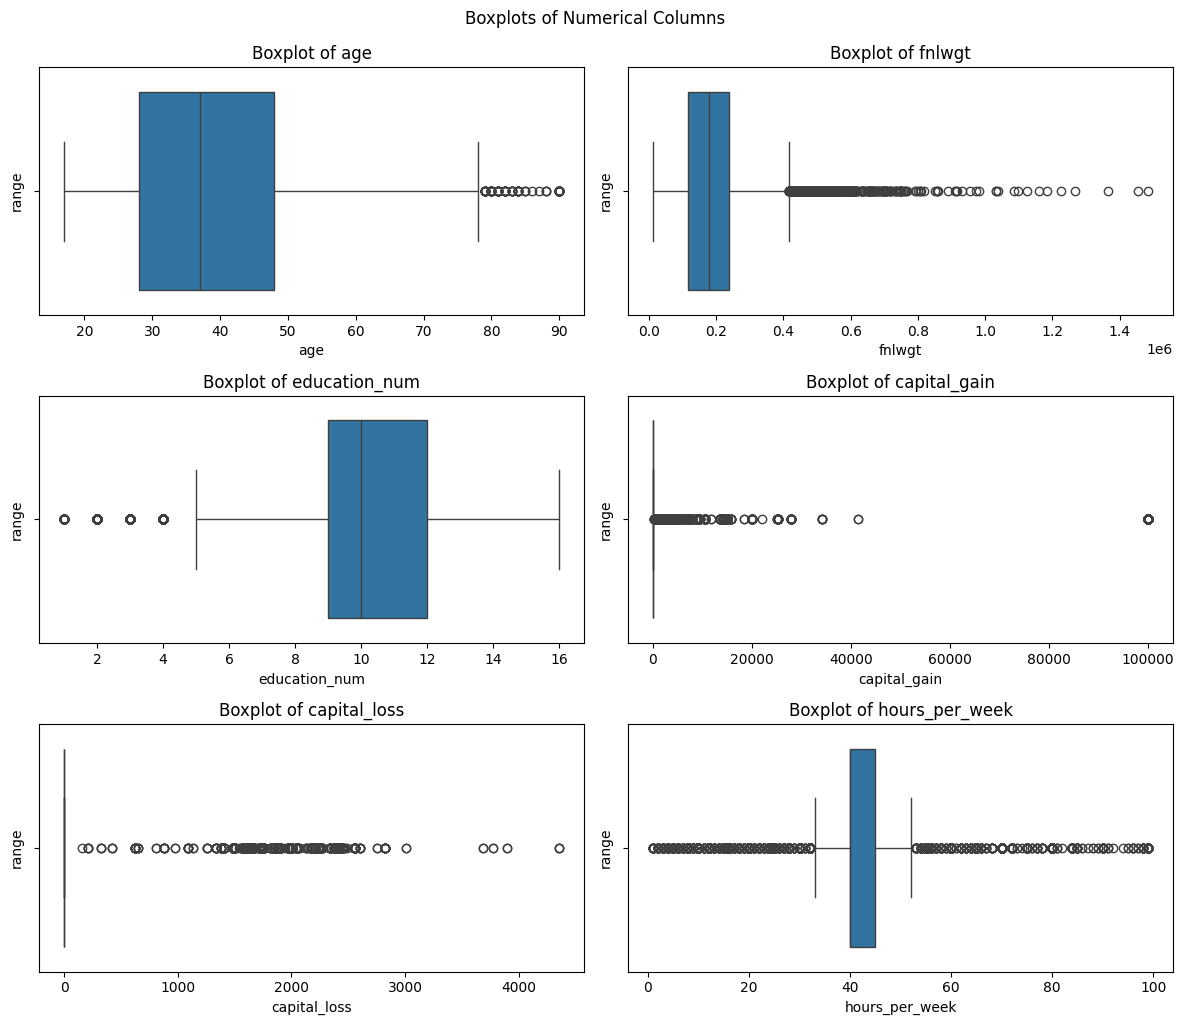

In [10]:
#Creating boxplots for numerical columns
fig, axes = plt.subplots(3,2, figsize=(12,10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('range')
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Columns', y=1.02)
plt.show()

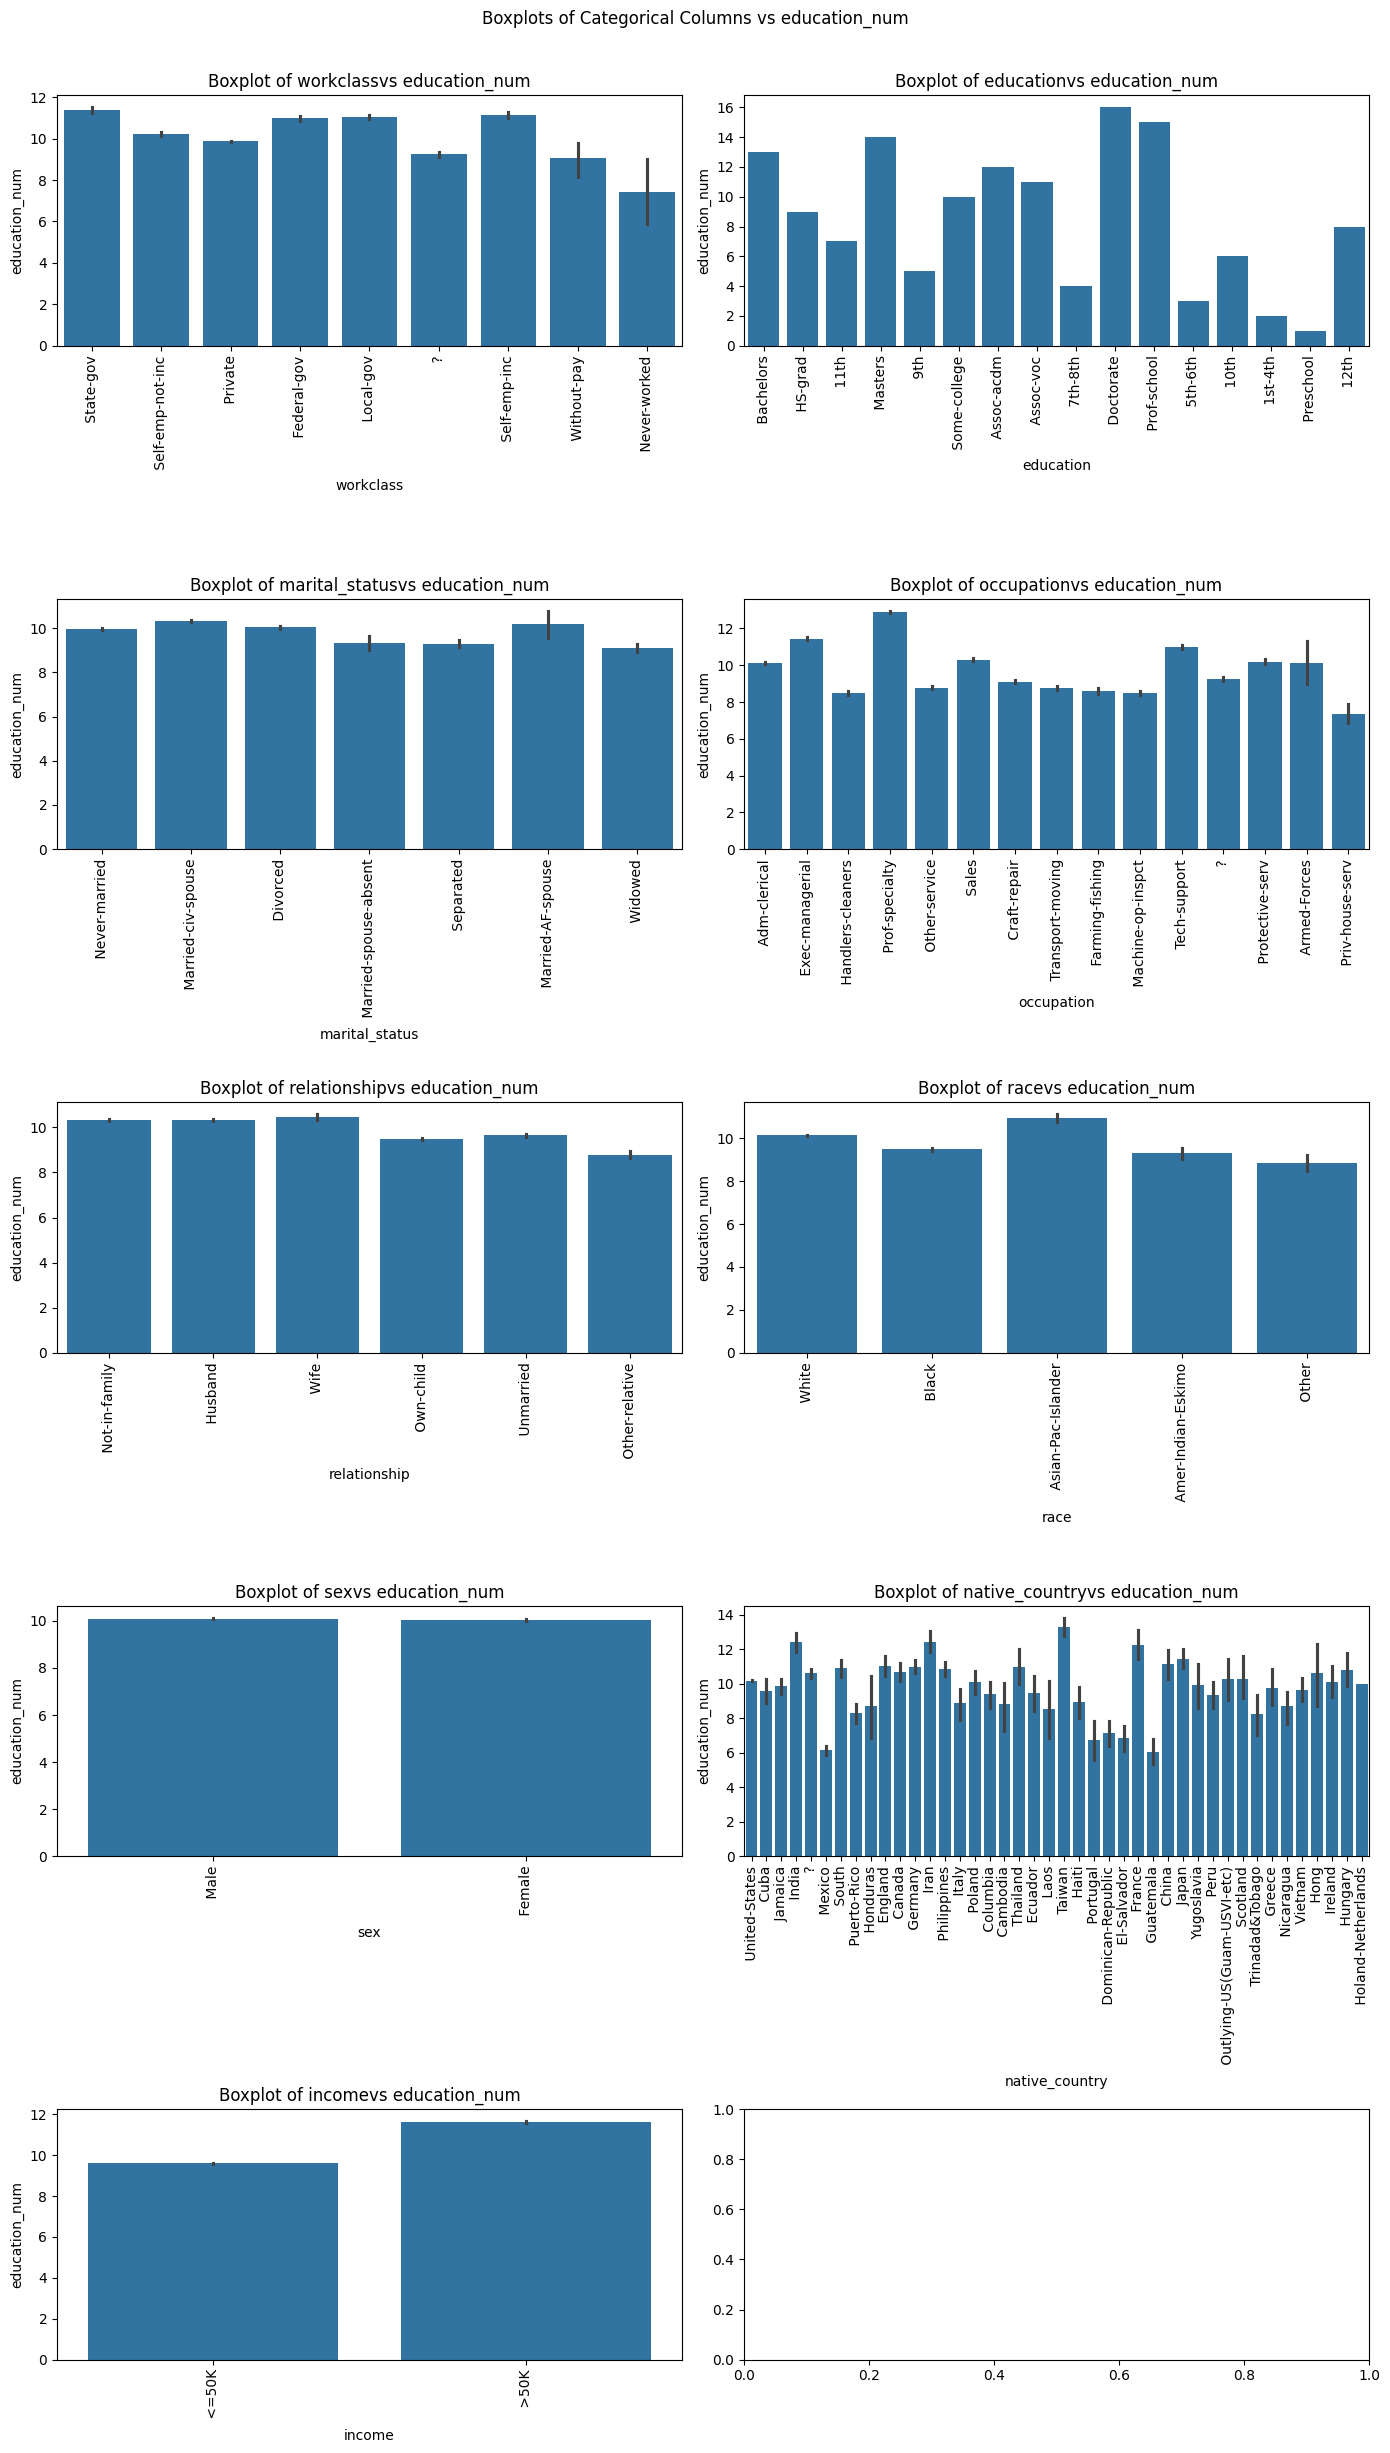

In [11]:
#Creating Boxplot for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(5,2, figsize=(14,24))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.barplot(data=df, x=col, y='education_num' ,ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('education_num')
    axes[i].set_title(f'Boxplot of {col}vs education_num')
    axes[i].tick_params(axis='x', rotation=90 )

plt.tight_layout()
plt.suptitle('Boxplots of Categorical Columns vs education_num', y=1.02)
plt.show()

<Figure size 1200x1000 with 0 Axes>

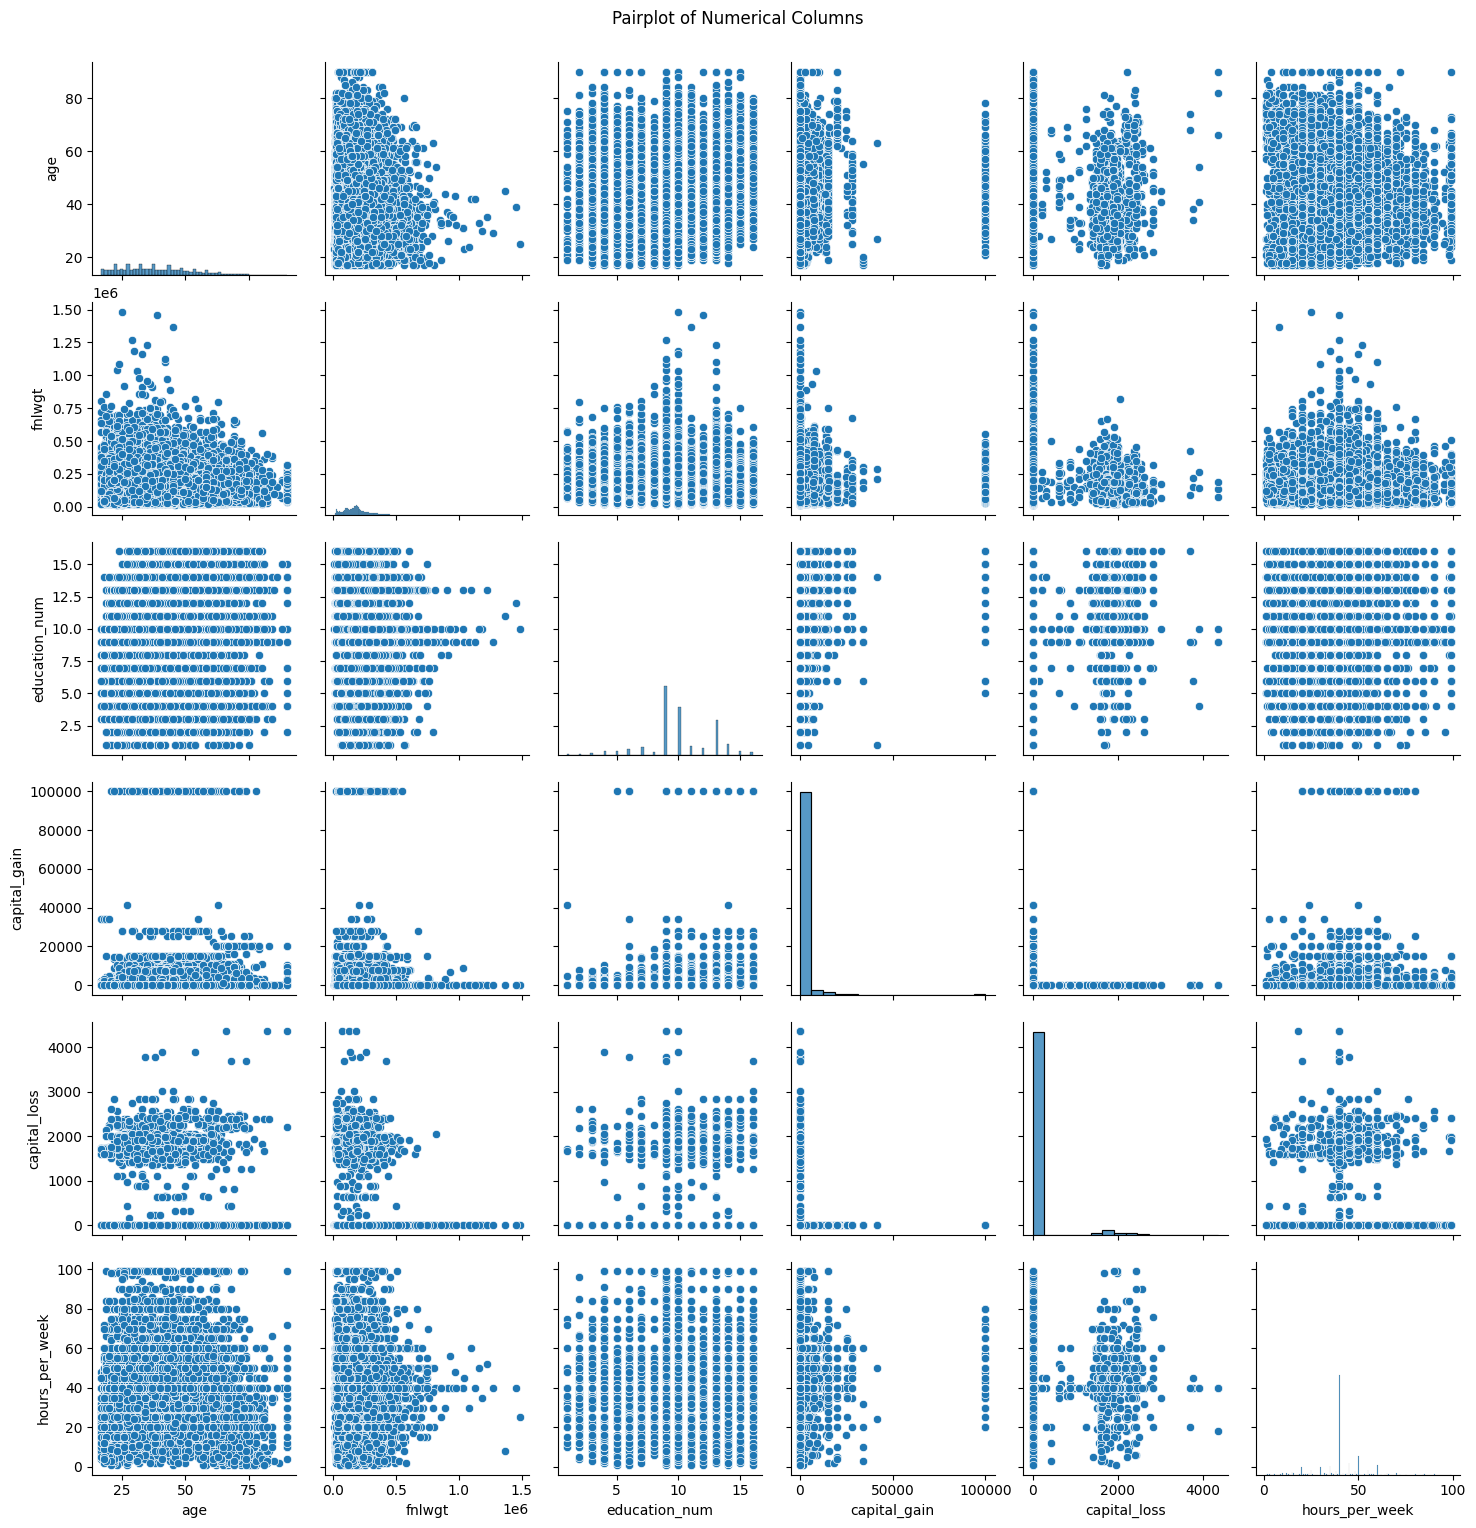

In [12]:
#Creating scatter plots between age and numerical columns
plt.figure(figsize=(12, 10))
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

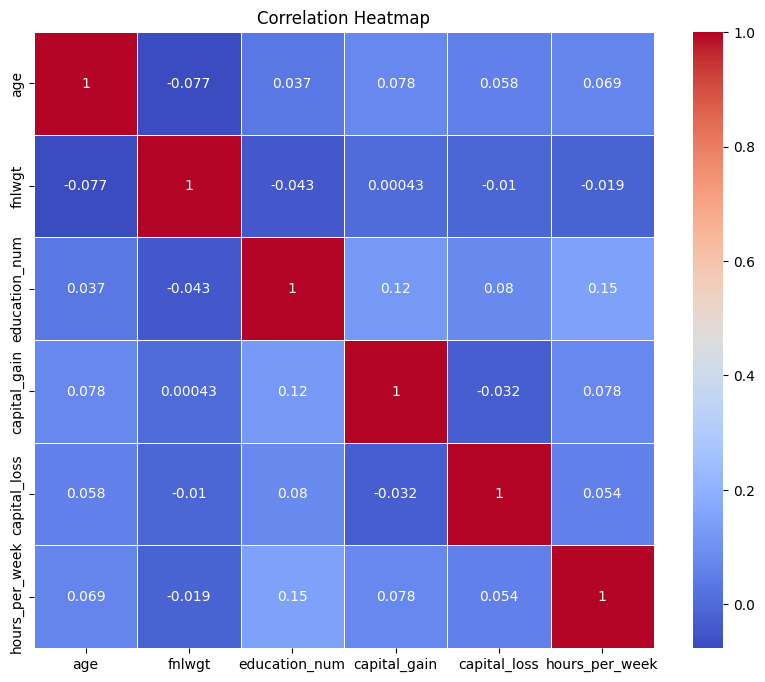

In [13]:
#Correlation heatmap
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

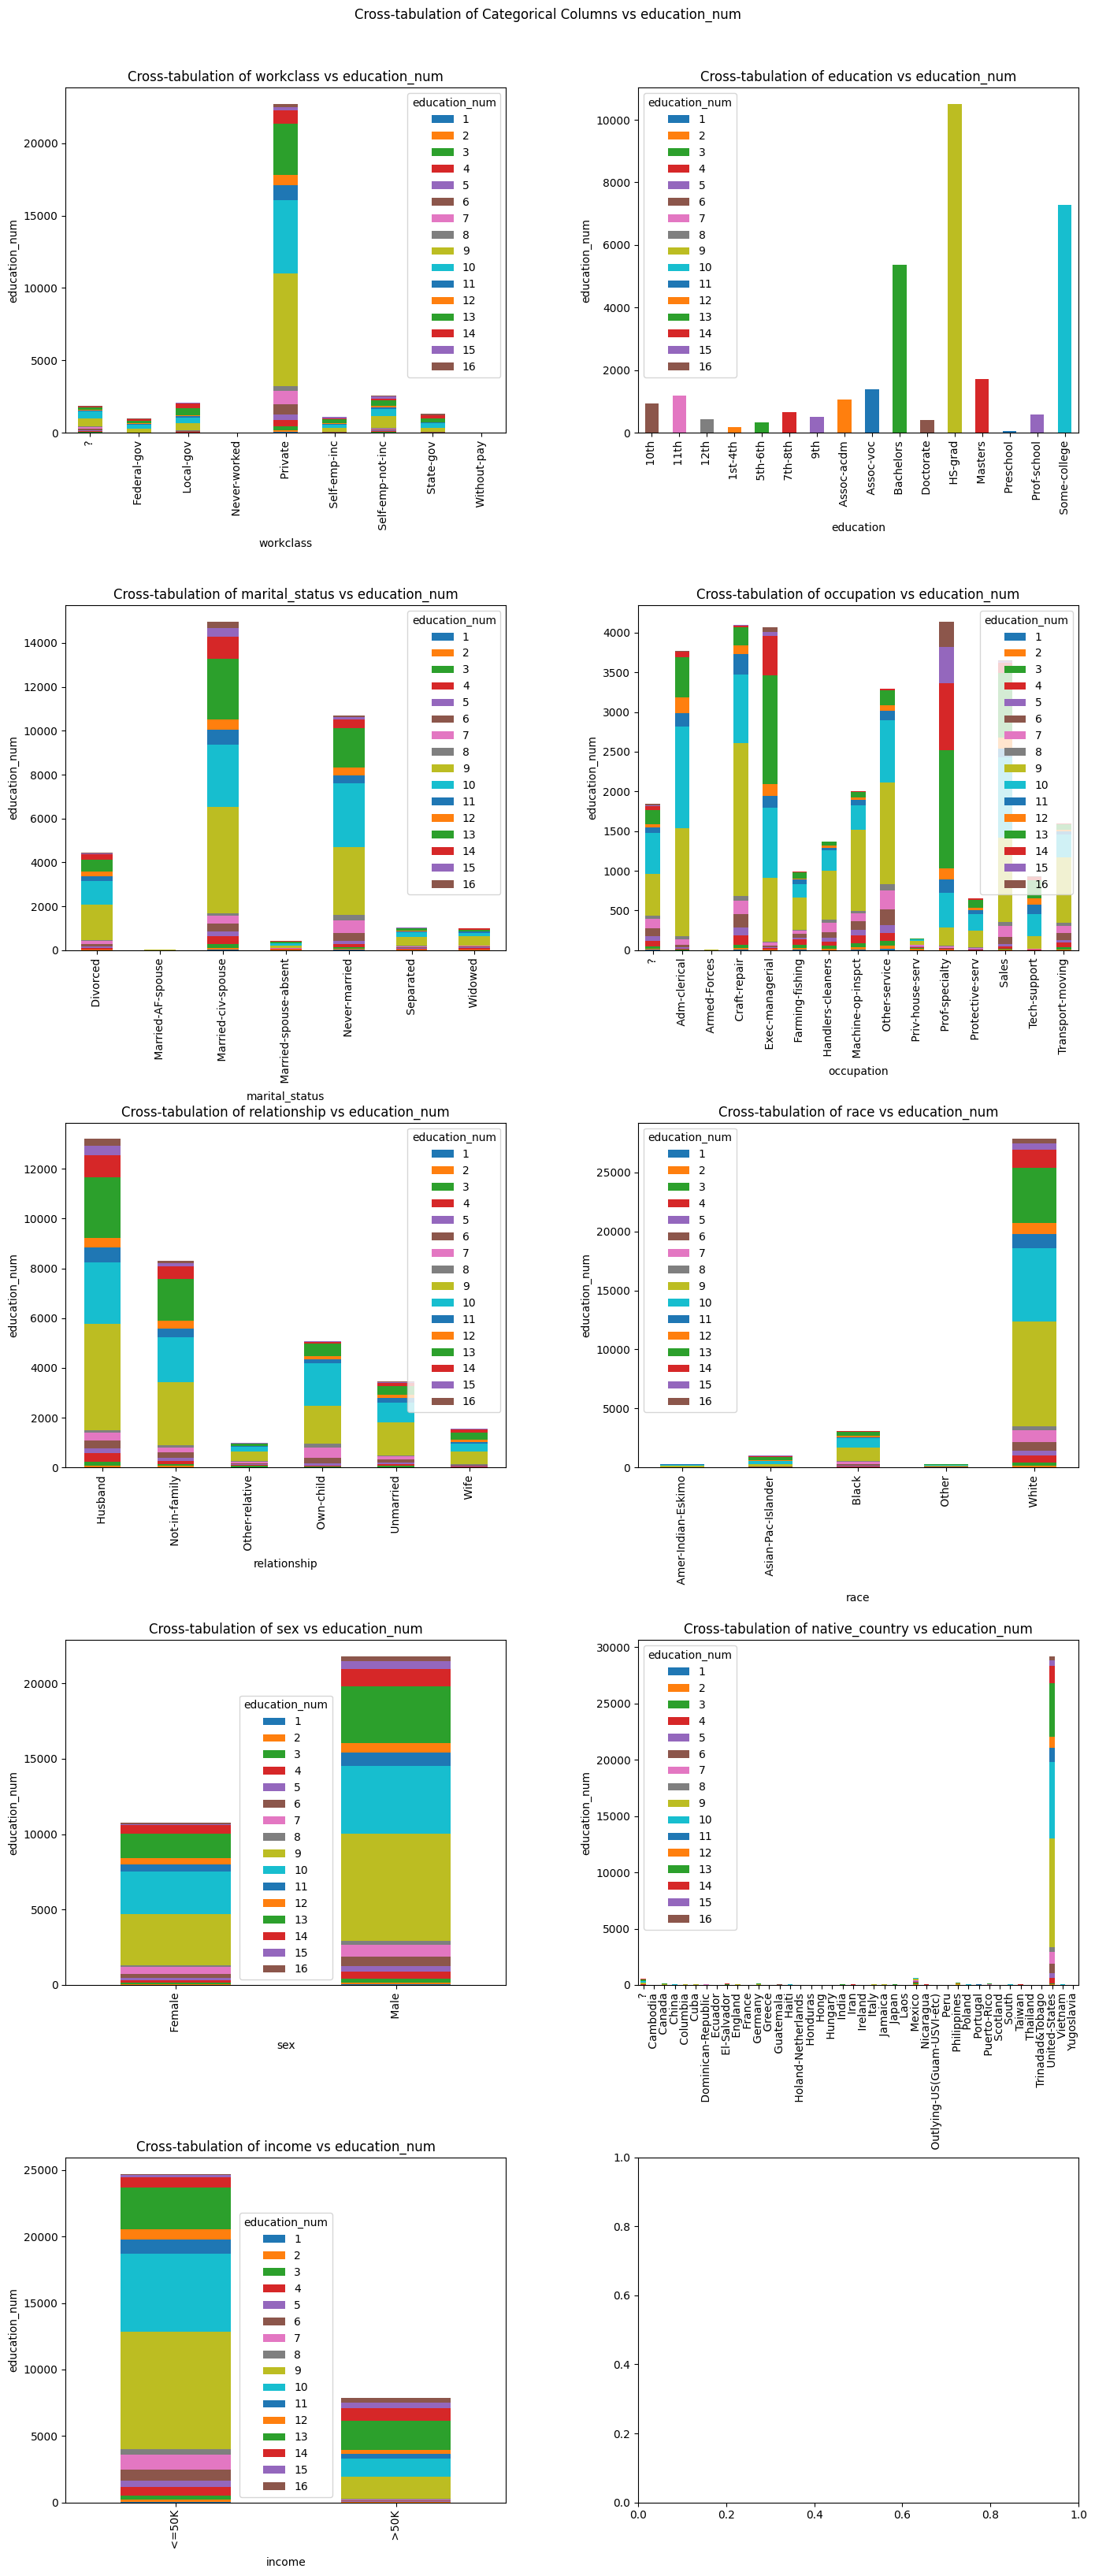

In [14]:
#Creating a cross-tabulation table
fig, axes = plt.subplots(5,2, figsize=(14,32))
axes = axes.flatten()

for i,col in enumerate(categorical_cols):
    cross_tab = pd.crosstab(df[col], df['education_num'])
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_xlabel
    axes[i].set_ylabel('education_num')
    axes[i].set_title(f'Cross-tabulation of {col} vs education_num')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.5,wspace = 0.3)
plt.suptitle('Cross-tabulation of Categorical Columns vs education_num', y=1.02)
plt.show()

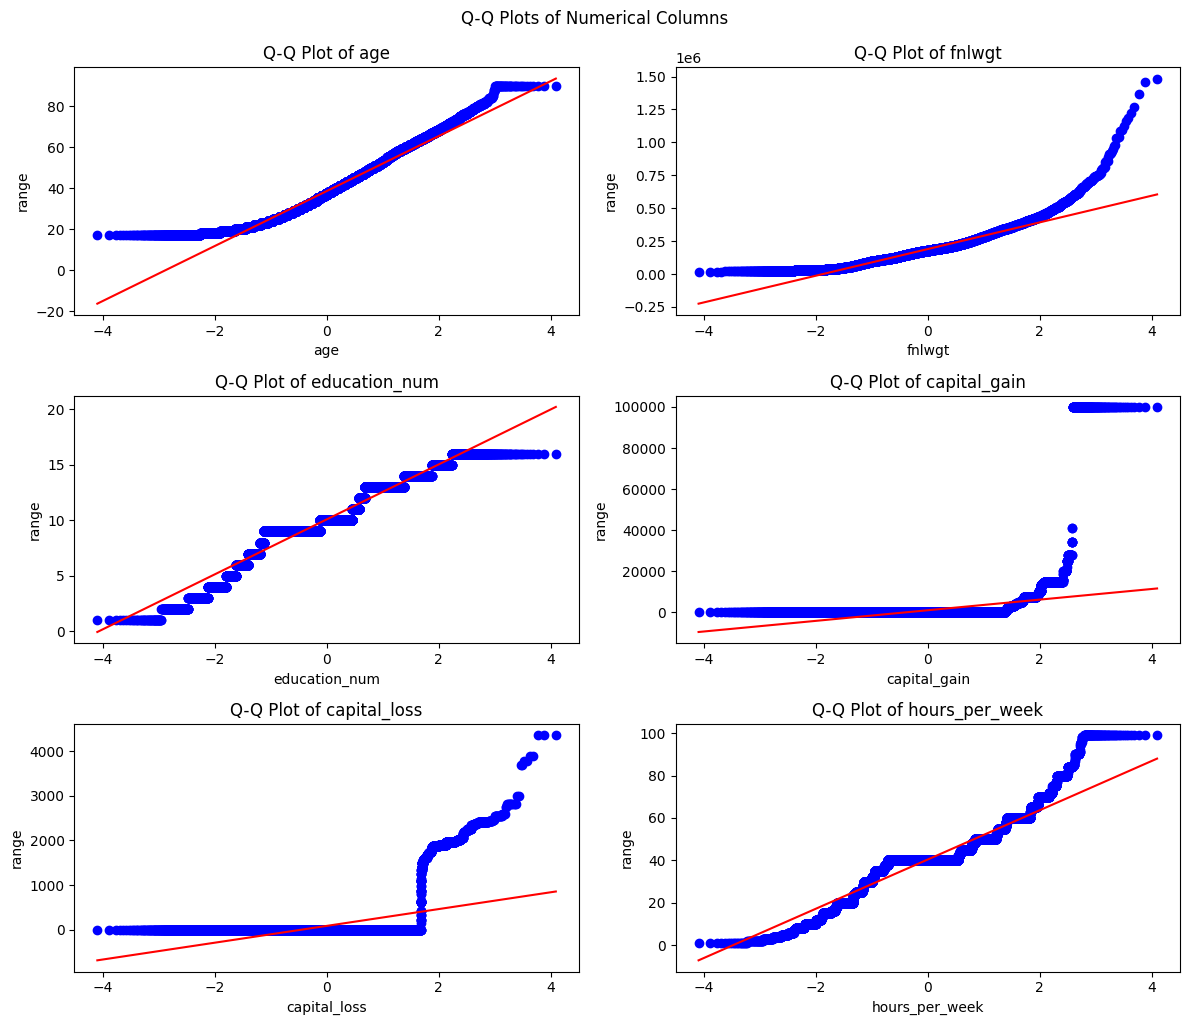

In [15]:
#Visualizing Q-Q plot of numerical varibles
import scipy.stats as stats
fig, axes = plt.subplots(3,2, figsize=(12,10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    stats.probplot(df[col], dist="norm", plot=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('range')
    axes[i].set_title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.suptitle('Q-Q Plots of Numerical Columns', y=1.02)
plt.show()

#### **Insights And Patterns**

**From Histograms And Boxplots**

>**=> Age** - Slightly right skewed with some Extreme values
  
  - The distribution is roughly bell shaped and centres around late 30s.
  - Most of the individuals are around 30 to 40s and individuals around 70 - 90s are represents extreme values.

>**Fnlwgt** - Highly right skewed with a lot of outliers

  - This variable might not follow a normal distribution since it has very wide range values.
  - Most of the values are centered between 100K - 400K.

>**Education_num** - Distinct peaks with few outliers at different values

  - The distribution seems near normal but has distinct peaks.
  - Most of the values around 9-12 meaning most of the working class require HS-graduates or above.

>**Capital_gain** - Extremely rightskewed with a lot of extreme values

  - A lot of employees have 0 as their capital gain which imbalance the distribution meaning that these extreme values represents self employeed people.
  - Most of the values are centres around 0 which indicates that it can further categorize.

>**Capital_loss** - Highly right skewed with extreme values.

 - Similar to capital gain most of the individuals have 0 capital loss implies only some few employees are investing their income.
 - A lot of values centered around 0 it can be further categorize just like capital gain.

>**Hours per week**

 - Distribution has little peaks with one high peak at value 40 suggesting that ~40 is standrd working hours in a week.
 - But few jobs require < 60 hours sugggesting that there some job requires high-responsibility or self employeed people who works hard to fill their needs.
 ---

**From Bar Charts**

 > => Workclass vs Education_Num
 - Government employees in federal/central,state or local required high level education to get a job so do some self employeed individuals to survive against corporate competition.
 - Some lower level jobs require certain skills than high level education to earn

  " Government sector  or self-emp in corporations workers may have higher education on average, while those work in maintaince jobs like plumbing,electrical,construction works etc tend to have lower education levels."

> => Marital_Status vs Education_Num
 - People who tend to marry civilian spouse have a higher education level than avg possibly because of age/life-stage factors or socioeconomic status.
 - Young employees who haven't married yet have lower lvl of education it might be because of circumstances of the individuals so in some extreme values like divorced,widowed or separated employees.

" Being married correlates with higher education lvl on average, while never-married individuals can be younger or less formally educated probably waiting for promotions to get married."

> => Occupation vs Education_Num
 - Professional specialty, Exec-managerial, and Tech-support commonly have the highest education lvl.
 - Occupations like Handlers-cleaners, Machine-op-inspect, and Private-house-service typically cluster around lower education levels suggests it require skills than education qualifications.

 "Professional and managerial roles tend to require (and attract) individuals with higher lvl education, whereas certain manual or service-oriented occupations requires skills in perticular areas than education.

> => Relationship vs. Education_Num
 - Husband / Wife relations have higher or similar educational lvl where as
 Own-child / Not-in-family / Unmarried in the house hold tend to fluctuates lower and mid range education qualifications

" Spouses (Husband/Wife) in a family context often have completed more schooling than other relationship categories, which may include dependents or single individuals."

> => Race vs. Education_Num
 - Asian-Pac-Islander or White often show a slightly higher education lvl than
 Black, Amer-Indian-Eskimo, or other categories
 - There is a significant overlap between groups with difference by 1-2 education levels.

" There is some variation in high lvl of education across racial categories, reflecting broader socioeconomic factors."

> => Sex vs. Education_Num
- Similar to race factor gender of the individuals hold significant overlap between males and females males hold slight majority in high lvl education than females
- Both genders spanned in the full range of education levels, but the median difference can hints at historical or demographic trends.

" There is an obvious small gap in higer education lvls between males and females, but the difference is not as clear as with other factors (like occupation or income).

> => Native_Country vs. Education_Num
 - Employees from US has  mid range around 10-12 which is higher than HS grad than some countries with Higher Education for e.g., Canada, Germany, India, Japan shows a slightly higher education lvl among immigrants, possibly reflecting selective migration of more educated individuals.
 - From Other countries like Mexico or certain underrepresented countries show a lower education_num due to different migration patterns or socioeconomic conditions.

" Immigration patterns can heavily influenced by how education levels vary by country of origin—some countries send more highly educated immigrants, while others do not."

> Income vs. Education_Num
 - A clear pattern usually emerges in the individuals earning >50K income have a noticeably higher education qualifications (often above 10) than those with <=50K income
 - Even within each income group, there can be a range of education levels, but the center of distribution shifts higher for the >50K group.

" Higher education lvl strongly correlates with earning above the $50K threshold, reinforcing the relationship between education and income.

<u>Overall Patterns</u>

 - Education & Occupation:-Special roles requiring specialized skills or managerial responsibilities correlate with higher educational attainment.

 - Marital Status & Relationship:- Married individuals, especially those in a “Husband/Wife” relationship, tend to have higher education—possibly reflecting age, socioeconomic status, and life choices.

 - Income & Education:- The strong positive association between education level and higher income stands out.

 - Demographic Factors:- Some race, sex, and native_country categories exhibit slightly different median education levels, highlighting broader socioeconomic patterns.
---

**From Scatterplots and Correlation heatmap**

> Capital Gain & Capital Loss
 - Both columns are heavily right-skewed with the vast majority of values at 0 and a few extreme outliers.
 - They show minimal correlation(|corr| < 0.12) with all other variables, reflecting how these outliers do not systematically align with age, education, or hours worked.

> Fnlwgt
  - Extremely wide range among the employees(from 12,000 to 1.48 mil), producing many outliers. Its scatterplots with other variables didn't have any clear linear trend.
 - Correlations hover around zero with most variables except a slight positive relationship with capital_loss(≈ 0.12). Overall, it seems largely independent.

> Age
 - Concentrated between 30 and 50, with fewer observations at older ages and it's scatterplots with other features(like capital_gain, hours_per_week) shows only mild patterns.
 - Correlates weakly with capital_gain(~0.08) and hours_per_week(~0.07), indicating no strong linear relationship.

> Education_Num
 - Clusters around 8-13 (typical high school to some college). Spread out across all ages and hours, suggesting no strong one-to-one mapping with age or work hours.
 - Shows the highest correlation(~0.14) with hours_per_week, hinting that individuals with higher education might work slightly more hours. Still, this is a weak linear link.

> Hours_Per_Week
 - Centered near 40 hours for most observations, with some working 60+ or even up to 99 hours.
 - Apart from the mild association with education_num (~0.14) and age (~0.07), there are no substantial linear correlations.

**<u>Overall Insights & Implications</u>**

 - Minimal Linear Relationships:- Both the pairplots and the correlation matrix confirm that none of the numeric variables strongly predict one another (|corr| < 0.3).
 - High Skew & Outliers:- capital_gain, capital_loss, and fnlwgt are heavily skewed, with outliers dominating their distributions.
 => Feature Engineering & Modeling:
 - Transformations: Applying log or other transformations to skewed variables could make them more feasible to linear models.
 - Non-Linear Models: Because correlations are weak, tree-based or other non-linear methods may better capture subtle interactions.
 - Interactions: Low pairwise correlations do not rule out the possibility of interaction effects—combining numeric variables or pairing them with categorical features could reveal stronger relationships.

## **Data Preprocessing**


### **Handling Missing Values**

In [16]:
#Checking for missing values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


> There are no missing values in the dataset so there's no need to remove or imputation to the data set most of the analysis might come close actual values

### **Handling outliers**

In [17]:
#Applying log transformation to certain columns to reduce the impact of outliers
df['capital_gain'] = np.log1p(df['capital_gain'])
df['capital_loss'] = np.log1p(df['capital_loss'])
df['fnlwgt'] = np.log1p(df['fnlwgt'])

### **Encoding Categorical Columns**

In [18]:
#Applying One-hot encoding to columns with less than 5 categories
df= pd.get_dummies(df,columns=['sex','income'])
df.astype(int,errors = 'ignore')
df[['sex_ Female','sex_ Male','income_ <=50K','income_ >50K']]=df[['sex_ Female','sex_ Male','income_ <=50K','income_ >50K']].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  int64  
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   capital_gain    32561 non-null  float64
 10  capital_loss    32561 non-null  float64
 11  hours_per_week  32561 non-null  int64  
 12  native_country  32561 non-null  object 
 13  sex_ Female     32561 non-null  int64  
 14  sex_ Male       32561 non-null  int64  
 15  income_ <=50K   32561 non-null  int64  
 16  income_ >50K    32561 non-null  int64  
dtypes: float64(3), int64(7), object

In [20]:
#Applying labelenconding to columns with 5 or above categories
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
selected_cols=['workclass','education','marital_status','occupation','relationship','race','native_country']
for col in selected_cols:
    df[col] = le.fit_transform(df[col])


In [21]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,11.258253,9,13,4,1,1,4,7.684784,0.0,40,39,0,1,1,0
1,50,6,11.330348,9,13,2,4,0,4,0.000000,0.0,13,39,0,1,1,0
2,38,4,12.281398,11,9,0,6,1,4,0.000000,0.0,40,39,0,1,1,0
3,53,4,12.366157,1,7,2,6,0,2,0.000000,0.0,40,39,0,1,1,0
4,28,4,12.732013,9,13,2,10,5,2,0.000000,0.0,40,5,1,0,1,0


### **=>Discuss the pros and cons of One-Hot Encoding and Label Encoding.**

<u>One-Hot Encoding</u>

Pros:

- There is no implied order for categorical column especially nominal

- Works well with algorithms that require numerical input ( linear regression, neural networks).

- Avoids Misleading Weighting: Prevents models from assuming ordinal relationships (eg: "lion" = 1, "crocodile" = 2 might imply "crocodile>lion").

Cons:

- Creates a new column for each category (curse of dimensionality), which can cause issues for models like k-NN or linear regression.

- sparse data in the presence of many zeros in the encoded matrix can slow down training or waste memory.

-With too many categories, models may memorize noise instead of learning patterns.

<u>Label Encoding</u>

Pros:

- Create compact data by converts categories to integers (such as "high" = 3, "medium" = 2, "low" = 1) and also preserving memory and computational efficiency.

- Perfect for ordinal categorical data where order matters (eg: "low," "medium," "high").

Cons:

- Algorithms (such as regression, SVM) may misinterpret encoded integers as having meaningful numerical relationships.

- Labeling creates bias like "dog" = 1, "cat" = 2 might lead the model to assume "cat" is twice as important as "dog."

#### **Scaling Numerical calumns**

In [22]:
#Standarizing the numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### **Feature Engineering**

In [23]:
#Creating a new feature based on employees education and their working hour in a week
df['ed_hours'] = df['education_num'] * df['hours_per_week']

#Scaling the new numeric column
df[['ed_hours']] = scaler.fit_transform(df[['ed_hours']])

In [24]:
#Creating a binary flag feature to employees whether they have capital gain or not
df['Cgain'] = (df['capital_gain'] > 0).astype(int)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,ed_hours,Cgain
0,0.030671,7,-1.150298,9,1.134739,4,1,1,4,2.831370,-0.221075,-0.035429,39,0,1,1,0,-0.177925,1
1,0.837109,6,-1.035993,9,1.134739,2,4,0,4,-0.299271,-0.221075,-2.222153,39,0,1,1,0,-2.522250,0
2,-0.042642,4,0.471867,11,-0.420060,0,6,1,4,-0.299271,-0.221075,-0.035429,39,0,1,1,0,-0.125882,0
3,1.057047,4,0.606250,1,-1.197459,2,6,0,2,-0.299271,-0.221075,-0.035429,39,0,1,1,0,-0.099860,0
4,-0.775768,4,1.186304,9,1.134739,2,10,5,2,-0.299271,-0.221075,-0.035429,5,1,0,1,0,-0.177925,0


###	**=>Discuss the scenarios where each scaling technique is preferred and why.**

**Standardization**
- Scenarios - when implimenting algorithmns with normally distributed data .
- why - to handles variance in the data
- limitation - sensitive in handling outliers.

**Min-Max scaling**
- scenarios - works well for bounded features like ratings,weights
- why - to preserve original distribution even after scaling.
- limitation - fails in the presence of outliers

**Robust**
- Scenarios - when data highly skewed data with outliers
- why - it resistance to outliers makes scaling possible
- limitation - ignores mean and variance of the data

**L2 Normalization**
- Scenario - work well for text/vector data like genres, colors,foods
- why - its cosine similarity	Focuses on direction,
- limitations -not for magnitude data and	Not for distance-based algorithms

**Log Transform**
- Scenario - when data is highly right-skewed data (distances,income)
- why - to reduce skewness in the data and stabilizes variance
- limitations - only for positive data
---

### **=>Log transformation Justification**

- when data is highly right-skewed which reduces skewness in features like income, house prices, or sensor readings, making distributions more symmetric (closer to Gaussian).

- data is converted multiplicative relationships into additive ones (e.g., exponential growth becomes linear in log space).

- it compresses the scale of large values, reducing the influence of extreme outliers ( few very capital gain or loss individuals).

- its stabilizes variance across data ranges (critical for linear models like regression that assume homoscedasticity).

### **Features Selection**

In [25]:
from sklearn.ensemble import IsolationForest
#Detecting outliers
numeric_cols = df.select_dtypes(include=[float, int]).columns

iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.01,  #Adjust based on how many outliers you expect
    random_state=42
)


In [26]:
#Fiting on the scaled numeric columns
outlier_preds = iso_forest.fit_predict(df[numeric_cols])

#Isolation Forest outputs -1 for outliers, 1 for inliers
df['outlier'] = outlier_preds

#Keeping only inliers
df = df[df['outlier'] == 1].drop('outlier', axis=1)

### **Outlier Affect on Modal Performance**

Outliers can degrade model performance in several ways:

 - Algorithms are sensitive to outliers especially when there is a linear models like linear regression when outliers disproportionately influence the slope (coefficients) due to squared error loss.

 Example: A single outlier can drastically shift the regression line.

 - In distance based models outliers distort the distance metrices like euclidean distance which leads to clustering or classification

 - Especially in gradient descent optimizations like Neural Networks outliers cause large gradients, destabilizing the training data.

 - Violate assumptions of normality like ANOVA, t-tests or homoscedasticity.

In [28]:
import ppscore as pps

pps_matrix = pps.matrix(df)  #Returns a DataFrame of x, y, ppscore, etc.

#Pivot the results to get a matrix format
pps_pivot = pps_matrix.pivot(index='y', columns='x', values='ppscore')


In [29]:
#Correlation of numerical feature after ppscore
corr_matrix =df.corr()

corr_matrix

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,ed_hours,Cgain
age,1.000000,0.007149,-0.059464,-0.007306,0.037318,-0.273555,-0.018975,-0.272619,0.028394,0.113598,0.050165,0.073343,0.006514,-0.096007,0.096007,-0.233617,0.233617,-0.004700,0.108541
workclass,0.007149,1.000000,-0.015748,0.022236,0.052934,-0.064653,0.251296,-0.089140,0.049751,0.031792,0.011240,0.137917,-0.007295,-0.091877,0.091877,-0.053024,0.053024,-0.007311,0.028291
fnlwgt,-0.059464,-0.015748,1.000000,-0.029768,-0.036720,0.026224,0.002779,0.011266,-0.013003,0.002922,-0.003249,-0.024999,-0.062747,-0.019377,0.019377,-0.000566,0.000566,-0.005287,0.002513
education,-0.007306,0.022236,-0.029768,1.000000,0.357385,-0.037848,-0.023336,-0.011684,0.012359,0.029293,0.017333,0.055866,0.062449,0.028460,-0.028460,-0.079412,0.079412,-0.103583,0.026133
education_num,0.037318,0.052934,-0.036720,0.357385,1.000000,-0.067294,0.107284,-0.103412,0.036243,0.119359,0.076785,0.146993,0.056051,-0.017880,0.017880,-0.330288,0.330288,0.039268,0.106541
marital_status,-0.273555,-0.064653,0.026224,-0.037848,-0.067294,1.000000,-0.009212,0.192870,-0.071293,-0.068890,-0.036119,-0.192922,-0.023367,0.130935,-0.130935,0.200183,-0.200183,0.045070,-0.065091
occupation,-0.018975,0.251296,0.002779,-0.023336,0.107284,-0.009212,1.000000,-0.075374,0.006569,0.023041,0.019368,0.077430,-0.012611,-0.079248,0.079248,-0.075124,0.075124,0.031876,0.020331
relationship,-0.272619,-0.089140,0.011266,-0.011684,-0.103412,0.192870,-0.075374,1.000000,-0.115989,-0.118252,-0.061283,-0.251900,-0.000327,0.579004,-0.579004,0.271409,-0.271409,0.006363,-0.111393
race,0.028394,0.049751,-0.013003,0.012359,0.036243,-0.071293,0.006569,-0.115989,1.000000,0.039698,0.020538,0.044098,0.132424,-0.086835,0.086835,-0.079057,0.079057,0.010605,0.038598
capital_gain,0.113598,0.031792,0.002922,0.029293,0.119359,-0.068890,0.023041,-0.118252,0.039698,1.000000,-0.062532,0.085370,0.024501,-0.100057,0.100057,-0.270891,0.270891,0.044191,0.993033
